# Pandas Training

In [1]:
import numpy as np
import pandas as pd

## Pandas Series

In [2]:
a = [1, 7, 2]
myvar = pd.Series(a)
print(myvar)
print(type(myvar))

0    1
1    7
2    2
dtype: int64
<class 'pandas.core.series.Series'>


In [3]:
# if nothing is specified, values are labeled with their index number, starting with index zero
# to create our own indexes, we use index argument

myvar = pd.Series(a, index = ["x", "y", "z"])
print(myvar)

x    1
y    7
z    2
dtype: int64


In [4]:
# we can use key/value pair like dictionaries to create Series
# the keys of the dictionary befome the labels

calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(calories)
print(myvar)

# if we only want to use. some of the items in the dictionary, we can ise the index argument to specify the items we want
myvar_2 = pd.Series(calories, index = ["day1", "day2"])
print(myvar_2)

day1    420
day2    380
day3    390
dtype: int64
day1    420
day2    380
dtype: int64


## DataFrame

In [5]:
data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai',
             'Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}

row_labels = [101, 102, 103, 104, 105, 106, 107]

df = pd.DataFrame(data, index = row_labels)
df

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [6]:
# to access a column in pandas

cities = df["city"]
print(cities)

# OR

cities_1 = df.city
print(cities_1)

print(type(cities))

101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object
101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object
<class 'pandas.core.series.Series'>


In [7]:
# Each column of a pandas DataFrame is an instance of pandas.Series, a structure that holds one-dimensional data and their labels. 
# You can get a single item of a Series object the same way you would with a dictionary, by using its label as a key:

cities[102]

'Toronto'

In [8]:
df["city"][102]

'Toronto'

In [9]:
# to access the whole row of the DataFrame

df.loc[103]

name          Jana
city        Prague
age             33
py-score      81.0
Name: 103, dtype: object

### creating pandas DataFrame
#### 1. with Dictionaries

In [10]:
# keys of the dictionary are the DataFrame's column labels and the dictionary values are the data values in the corresponding DataFrame columns.

d = {'x': [1, 2, 3], 'y': np.array([2, 4, 8]), 'z': 100}
df_1 = pd.DataFrame(d)
df_1

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


In [11]:
# we can control the order of the columns with the columns parameter.

df_2 = pd.DataFrame(d, index = [100, 200, 300], columns = ["z", "y", "x"])
df_2

,z,y,x
100,100,2,1
200,100,4,2
300,100,8,3


#### 2.  list of dictionaries

In [12]:
l = [{'x': 1, 'y': 2, 'z': 100},
     {'x': 2, 'y': 4, 'z': 100},
     {'x': 3, 'y': 8, 'z': 100}]

df_3 = pd.DataFrame(l)
df_3

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


#### 3. nested lists

In [13]:
l = [[1, 2, 100],
     [2, 4, 100],
     [3, 8, 100]]

df_4 = pd.DataFrame(l, columns=['x', 'y', 'z'])
df_4

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


#### 4. list of tuples

In [14]:
m = [(1, 2), (2, 4), (3, 8)]
df_5 = pd.DataFrame(m, columns = ["x", "y"])
df_5

,x,y
0,1,2
1,2,4
2,3,8


#### 5. numpy arrays

In [15]:
arr = np.array([[1, 2, 100],
                [2, 4, 100],
                [3, 8, 100]])

df_6 = pd.DataFrame(arr, columns=['x', 'y', 'z'])
df_6

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


In [16]:
# Although this example looks almost the same as the nested list implementation above, it has one advantage: You can specify the optional parameter copy.
# When copy is set to False (its default setting), the data from the NumPy array isn’t copied. This means that the original data from the array is assigned to the pandas DataFrame. If you modify the array, then your DataFrame will change too:

arr[0, 0] = 1000
df_6

# if this behavior isn’t what you want, then you should specify copy=True in the DataFrame constructor. That way, df_ will be created with a copy of the values from arr instead of the actual values.

,x,y,z
0,1000,2,100
1,2,4,100
2,3,8,100


## Importing and Exporting
#### saving and reading from CSV

In [17]:
# saving data to csv file
df.to_csv('data.csv')

# reading data from CSV file
# index_col=0 specifies that the row labels are located in the first column of the CSV file.
pd.read_csv('data.csv', index_col = 0)

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


## Retrieving Data

In [18]:
# access row labels
df.index

Index([101, 102, 103, 104, 105, 106, 107], dtype='int64')

In [19]:
# access column names
df.columns

Index(['name', 'city', 'age', 'py-score'], dtype='object')

In [20]:
# if we want to modify labels
df.index = np.arange(10,17)
print(df.index)
print(df)

Index([10, 11, 12, 13, 14, 15, 16], dtype='int64')
      name         city  age  py-score
10  Xavier  Mexico City   41      88.0
11     Ann      Toronto   28      79.0
12    Jana       Prague   33      81.0
13      Yi     Shanghai   34      80.0
14   Robin   Manchester   38      68.0
15    Amal        Cairo   31      61.0
16    Nori        Osaka   37      84.0


In [21]:
# if we want to access data without the labels we can use either of these below

df.values

# OR

#df.to_numpy()

array([['Xavier', 'Mexico City', 41, 88.0],
       ['Ann', 'Toronto', 28, 79.0],
       ['Jana', 'Prague', 33, 81.0],
       ['Yi', 'Shanghai', 34, 80.0],
       ['Robin', 'Manchester', 38, 68.0],
       ['Amal', 'Cairo', 31, 61.0],
       ['Nori', 'Osaka', 37, 84.0]], dtype=object)

## pandas DataFrame Size

In [22]:
# return number of dimensions: this below returns 2 because we have 2 dimensions (rows and columns)
print(df.ndim)

# return number of data values across each demension: this below returns (7, 4) first number for number of rows and second number for number of columns
print(df.shape)

# total number of data values: this returns and integer equal to the number of values in the DataFrame
print(df.size)

2
(7, 4)
28


## Accessing Data

In [23]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


#### Access certain rows and columns

In [24]:
# access particular column
df["name"]

10    Xavier
11       Ann
12      Jana
13        Yi
14     Robin
15      Amal
16      Nori
Name: name, dtype: object

In [25]:
# access particular row
# .loc accessor use row or column labels to access the data
df.loc[10]

name             Xavier
city        Mexico City
age                  41
py-score           88.0
Name: 10, dtype: object

In [26]:
df.loc[10, "name"]

'Xavier'

In [27]:
# .iloc accessor use row or column indexes to access the data
df.iloc[0]

name             Xavier
city        Mexico City
age                  41
py-score           88.0
Name: 10, dtype: object

In [28]:
df.iloc[0, 0]

'Xavier'

#### Slicing

In [29]:
# loc and iloc allows slicing

df.loc[:, 'city']

10    Mexico City
11        Toronto
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

In [30]:
df.iloc[:, 1]

10    Mexico City
11        Toronto
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

In [31]:
# to access multiple rows or columns
df.loc[11:15, ['name', 'city']]

,name,city
11,Ann,Toronto
12,Jana,Prague
13,Yi,Shanghai
14,Robin,Manchester
15,Amal,Cairo


In [32]:
df.iloc[1:6, [0, 1]]

,name,city
11,Ann,Toronto
12,Jana,Prague
13,Yi,Shanghai
14,Robin,Manchester
15,Amal,Cairo


In [33]:
# on 2 examples above, This brings up a very important difference between .loc[] and .iloc[]. 
# As you can see from the previous example, when you pass the row labels 11:15 to .loc[], you get the rows 11 through 15. 
# However, when you pass the row indices 1:6 to .iloc[], you only get the rows with the indices 1 through 5.

# with .loc[] both start and stop indicies are inclusive, meaning they are included. with the returned values
# with .iloc[] the stop index of the a slice is exclusive, meaning it is excluded from the returned values.

In [34]:
# Skip every other row
df.iloc[1:6:2, 0]

11     Ann
13      Yi
15    Amal
Name: name, dtype: object

#### at [ ] and iat [ ]

In [35]:
# It’s possible to use .loc[] and .iloc[] to get particular data values. 
# However, when you need only a single value, pandas recommends using the specialized accessors .at[] and .iat[]:

df.at[12, 'name']

# OR

# df.iat[2, 0]

'Jana'

## Modifying Data

In [36]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


In [37]:
# The statement df.loc[:13, 'py-score'] = [40, 50, 60, 70] modifies the first four items (rows 10 through 13) in the column py-score using the values from your supplied list. 
# Using df.loc[14:, 'py-score'] = 0 sets the remaining values in this column to 0.

df.loc[:, 'py-score']
df.loc[:13, 'py-score'] = [40, 50, 60, 70]
df.loc[14:, 'py-score'] = 0

df['py-score']

10    40.0
11    50.0
12    60.0
13    70.0
14     0.0
15     0.0
16     0.0
Name: py-score, dtype: float64

In [38]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,40.0
11,Ann,Toronto,28,50.0
12,Jana,Prague,33,60.0
13,Yi,Shanghai,34,70.0
14,Robin,Manchester,38,0.0
15,Amal,Cairo,31,0.0
16,Nori,Osaka,37,0.0


In [39]:
# using negative indecies

df.iloc[:, -1] = np.array([88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0])
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


## Inserting and Deleting Rows

In [40]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


#### Inserting Row: Basic method

In [41]:
df.loc[17] = ["john", "Boston", 34, 79] 
df.loc[18] = ["Tom", "Denver", 30, 95]
df.loc[19] = ["Drake", "New York", 30, 80]
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0
17,john,Boston,34,79.0
18,Tom,Denver,30,95.0
19,Drake,New York,30,80.0


#### Inserting Row: concat ( ) method

In [42]:
# Create a dataframe

dict = {"Mathematics":[95, 90, 99],
        "Science": [99, 95, 92]}
 
df1 = pd.DataFrame(dict, index=["Aiyana", "Anisha", "Saanvi"])

# Create another dataframe

df2 = pd.DataFrame({"Mathematics": [96],
                    "Science": [99]},
                   index=["Snehal"])

# Concat dataframes

pd.concat([df1, df2])

,Mathematics,Science
Aiyana,95,99
Anisha,90,95
Saanvi,99,92
Snehal,96,99


#### Removing Row

In [43]:
# removing row

df = df.drop(labels = 17)

# OR

df = df.drop(labels = [18, 19])

df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


In [44]:
# By default, it returns the pandas DataFrame with the specified rows removed. 
# If you pass inplace=True, then the original DataFrame will be modified and you’ll get None as the return value.

## Inserting and Deleting Columns
#### Inserting new column

In [45]:
# easy way to add column but it will add the column to end of the dataframe

df['total-score'] = 0.0
df

,name,city,age,py-score,total-score
10,Xavier,Mexico City,41,88.0,0.0
11,Ann,Toronto,28,79.0,0.0
12,Jana,Prague,33,81.0,0.0
13,Yi,Shanghai,34,80.0,0.0
14,Robin,Manchester,38,68.0,0.0
15,Amal,Cairo,31,61.0,0.0
16,Nori,Osaka,37,84.0,0.0


In [46]:
df['js-score'] = np.array([71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80.0])
df

,name,city,age,py-score,total-score,js-score
10,Xavier,Mexico City,41,88.0,0.0,71.0
11,Ann,Toronto,28,79.0,0.0,95.0
12,Jana,Prague,33,81.0,0.0,88.0
13,Yi,Shanghai,34,80.0,0.0,79.0
14,Robin,Manchester,38,68.0,0.0,91.0
15,Amal,Cairo,31,61.0,0.0,91.0
16,Nori,Osaka,37,84.0,0.0,80.0


In [47]:
# if the location of the new column is important:

df.insert(loc=4, column='django-score',
          value=np.array([86.0, 81.0, 78.0, 88.0, 74.0, 70.0, 81.0]))
df

,name,city,age,py-score,django-score,total-score,js-score
10,Xavier,Mexico City,41,88.0,86.0,0.0,71.0
11,Ann,Toronto,28,79.0,81.0,0.0,95.0
12,Jana,Prague,33,81.0,78.0,0.0,88.0
13,Yi,Shanghai,34,80.0,88.0,0.0,79.0
14,Robin,Manchester,38,68.0,74.0,0.0,91.0
15,Amal,Cairo,31,61.0,70.0,0.0,91.0
16,Nori,Osaka,37,84.0,81.0,0.0,80.0


#### Deleting a column: del statement

In [48]:
del df['total-score']
df

,name,city,age,py-score,django-score,js-score
10,Xavier,Mexico City,41,88.0,86.0,71.0
11,Ann,Toronto,28,79.0,81.0,95.0
12,Jana,Prague,33,81.0,78.0,88.0
13,Yi,Shanghai,34,80.0,88.0,79.0
14,Robin,Manchester,38,68.0,74.0,91.0
15,Amal,Cairo,31,61.0,70.0,91.0
16,Nori,Osaka,37,84.0,81.0,80.0


#### Deleting a column: .pop ( ) method

In [49]:
# Another similarity to dictionaries is the ability to use .pop(), which removes the specified column and returns it. 
# That means you could do something like df.pop('total-score') instead of using del.

#### Deleting a column .drop ( ) method

In [50]:
# You can also remove one or more columns with .drop() as you did previously with the rows. 
# Again, you need to specify the labels of the desired columns with labels. 
# In addition, when you want to remove columns, you need to provide the argument axis=1:
# By default, .drop() returns the DataFrame without the specified columns unless you pass inplace=True.

df = df.drop(labels='age', axis=1)
df

,name,city,py-score,django-score,js-score
10,Xavier,Mexico City,88.0,86.0,71.0
11,Ann,Toronto,79.0,81.0,95.0
12,Jana,Prague,81.0,78.0,88.0
13,Yi,Shanghai,80.0,88.0,79.0
14,Robin,Manchester,68.0,74.0,91.0
15,Amal,Cairo,61.0,70.0,91.0
16,Nori,Osaka,84.0,81.0,80.0


## Arithmetic Operations
#### Basic operations

In [51]:
df['py-score'] + df['js-score']

10    159.0
11    174.0
12    169.0
13    159.0
14    159.0
15    152.0
16    164.0
dtype: float64

In [52]:
df['py-score'] / 100

10    0.88
11    0.79
12    0.81
13    0.80
14    0.68
15    0.61
16    0.84
Name: py-score, dtype: float64

In [53]:
# we can use these to add new column to our dataframe

df['total'] = 0.4 * df['py-score'] + 0.3 * df['django-score'] + 0.3 * df['js-score']
df

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
11,Ann,Toronto,79.0,81.0,95.0,84.4
12,Jana,Prague,81.0,78.0,88.0,82.2
13,Yi,Shanghai,80.0,88.0,79.0,82.1
14,Robin,Manchester,68.0,74.0,91.0,76.7
15,Amal,Cairo,61.0,70.0,91.0,72.7
16,Nori,Osaka,84.0,81.0,80.0,81.9


## Applying Numpy and Scipy Functions

In [54]:
# Instead of passing a NumPy array to numpy.average(), you’ll pass a part of your pandas DataFrame:

score = df.iloc[:, 2:5]
score

,py-score,django-score,js-score
10,88.0,86.0,71.0
11,79.0,81.0,95.0
12,81.0,78.0,88.0
13,80.0,88.0,79.0
14,68.0,74.0,91.0
15,61.0,70.0,91.0
16,84.0,81.0,80.0


In [55]:
np.average(score, axis=1, weights=[0.4, 0.3, 0.3])

array([82.3, 84.4, 82.2, 82.1, 76.7, 72.7, 81.9])

In [56]:
# The variable score now refers to the DataFrame with the Python, Django, and JavaScript scores. 
# You can use score as an argument of numpy.average() and get the linear combination of columns with the specified weights.

In [57]:
# we can do all operations above as a single statement but first need to delete existing "total" column

del df["total"]

df['total'] = np.average(df.iloc[:, 2:5], axis=1, weights=[0.4, 0.3, 0.3])
df


,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
11,Ann,Toronto,79.0,81.0,95.0,84.4
12,Jana,Prague,81.0,78.0,88.0,82.2
13,Yi,Shanghai,80.0,88.0,79.0,82.1
14,Robin,Manchester,68.0,74.0,91.0,76.7
15,Amal,Cairo,61.0,70.0,91.0,72.7
16,Nori,Osaka,84.0,81.0,80.0,81.9


## Sorting DataFrame .sort_values ( )

In [58]:
# this example sorts dataframe by values in column "js_score" in descending order
df.sort_values(by='js-score', ascending=False)

,name,city,py-score,django-score,js-score,total
11,Ann,Toronto,79.0,81.0,95.0,84.4
14,Robin,Manchester,68.0,74.0,91.0,76.7
15,Amal,Cairo,61.0,70.0,91.0,72.7
12,Jana,Prague,81.0,78.0,88.0,82.2
16,Nori,Osaka,84.0,81.0,80.0,81.9
13,Yi,Shanghai,80.0,88.0,79.0,82.1
10,Xavier,Mexico City,88.0,86.0,71.0,82.3


In [59]:
# You can pass axis to choose if you want to sort rows (axis=0) or columns (axis=1).

In [60]:
# if we want to sort by multiple columns
# In this case, the DataFrame is sorted by the column total, but if two values are the same, then their order is determined by the values from the column py-score.

df.sort_values(by=['total', 'py-score'], ascending=[False, False])

,name,city,py-score,django-score,js-score,total
11,Ann,Toronto,79.0,81.0,95.0,84.4
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
12,Jana,Prague,81.0,78.0,88.0,82.2
13,Yi,Shanghai,80.0,88.0,79.0,82.1
16,Nori,Osaka,84.0,81.0,80.0,81.9
14,Robin,Manchester,68.0,74.0,91.0,76.7
15,Amal,Cairo,61.0,70.0,91.0,72.7


In [61]:
# .sort_values() has options inplace parameter. It’s set to False by default, ensuring .sort_values() returns a new pandas DataFrame. 
# When you set inplace=True, the existing DataFrame will be modified and .sort_values() will return None.

## Filtering Data

In [62]:
# If you apply some logical operation on a Series object, then you’ll get another Series with the Boolean values True and False:


In [63]:
filter_ = df['django-score'] >= 80
filter_

10     True
11     True
12    False
13     True
14    False
15    False
16     True
Name: django-score, dtype: bool

In [64]:
# You now have the Series filter_ filled with Boolean data. The expression df[filter_] returns a pandas DataFrame with the rows from df that correspond to True in filter_:

df[filter_]

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
11,Ann,Toronto,79.0,81.0,95.0,84.4
13,Yi,Shanghai,80.0,88.0,79.0,82.1
16,Nori,Osaka,84.0,81.0,80.0,81.9


In [65]:
# You can create very powerful and sophisticated expressions by combining logical operations with the following operators:

#     NOT (~)
#     AND (&)
#     OR (|)
#     XOR (^)

In [66]:
# you can get a DataFrame with the candidates whose py-score and js-score are greater than or equal to 80:
df[(df['py-score'] >= 80) & (df['js-score'] >= 80)]

,name,city,py-score,django-score,js-score,total
12,Jana,Prague,81.0,78.0,88.0,82.2
16,Nori,Osaka,84.0,81.0,80.0,81.9


#### .where ( ) method

In [67]:
# It replaces the values in the positions where the provided condition isn’t satisfied:
# In this example, the condition is df['django-score'] >= 80. The values of the DataFrame or Series that calls .where() will remain the same where the condition is True 
# it will be replaced with the value of other (in this case 0.0) where the condition is False.


df['django-score'].where(cond=df['django-score'] >= 80, other=0.0)

10    86.0
11    81.0
12     0.0
13    88.0
14     0.0
15     0.0
16    81.0
Name: django-score, dtype: float64

## Determining Data Statistics
#### .describe ( )

In [68]:
# get basic statistics for the numerical columns of a pandas DataFrame
# .describe() returns a new DataFrame with the number of rows indicated by count, as well as the mean, standard deviation, minimum, maximum, and quartiles of the columns.

df.describe()

,py-score,django-score,js-score,total
count,7.000000,7.000000,7.000000,7.000000
mean,77.285714,79.714286,85.000000,80.328571
std,9.446592,6.343350,8.544004,4.101510
min,61.000000,70.000000,71.000000,72.700000
25%,73.500000,76.000000,79.500000,79.300000
50%,80.000000,81.000000,88.000000,82.100000
75%,82.500000,83.500000,91.000000,82.250000
max,88.000000,88.000000,95.000000,84.400000


#### .mean ( )

In [69]:
df["py-score"].mean()

77.28571428571429

#### .std ( )

In [70]:
df["py-score"].std()

9.446591726019244

## Handling Missing Data

In [71]:
# pandas usually represents missing data with NaN (not a number) values.

In [72]:
df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})
df_

,x
0,1.0
1,2.0
2,NaN
3,4.0


In [73]:
# Many pandas methods omit nan values when performing calculations unless they are explicitly instructed not to:

df_.mean()

x    2.333333
dtype: float64

In [74]:
df_.mean(skipna = False)

x   NaN
dtype: float64

#### 1. filling missing data: .fillna ( )

In [75]:
# you can use .fillna () to replace missing value with specified value
df_.fillna(value = 0)

# OR, replace the missing value with value above the missing value
# df_.fillna(method='ffill')

# OR, # OR, replace the missing value with value below the missing value
# df_.fillna(method='bfill')

,x
0,1.0
1,2.0
2,0.0
3,4.0


#### 2. filling missing data: .interpolate ( )

In [76]:
# replace missing values with interpolated values.
#. interpolate value: Interpolation means determining a value from the existing values in a given data set. 

df_.interpolate()

,x
0,1.0
1,2.0
2,3.0
3,4.0


In [77]:
# You can also use the optional parameter inplace with .fillna(). Doing so will:

#     Create and return a new DataFrame when inplace=False
#     Modify the existing DataFrame and return None when inplace=True
#     The default setting for inplace is False. However, inplace=True can be very useful when you’re working with large amounts of data and want to prevent unnecessary and inefficient copying.

#### 3. Deleting rows and columns with missign data: .dropna ( )

In [78]:
# In certain situations, you might want to delete rows or even columns that have missing values. You can do this with .dropna():

df_.dropna()

,x
0,1.0
1,2.0
3,4.0


## Iterating over a pandas series

In [79]:
# iterating over a pandas dataframe:

#     .items() to iterate over columns
#     .iterrows() to iterate over rows
#     .itertuples() to iterate over rows and get named tuples

#### .items ( )

In [81]:
# With .items(), you iterate over the columns of a pandas DataFrame. 
# Each iteration yields a tuple with the name of the column and the column data as a Series object:

for col_label, col in df.items():
    print(col_label, col, sep='\n', end='\n\n')

name
10    Xavier
11       Ann
12      Jana
13        Yi
14     Robin
15      Amal
16      Nori
Name: name, dtype: object

city
10    Mexico City
11        Toronto
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

py-score
10    88.0
11    79.0
12    81.0
13    80.0
14    68.0
15    61.0
16    84.0
Name: py-score, dtype: float64

django-score
10    86.0
11    81.0
12    78.0
13    88.0
14    74.0
15    70.0
16    81.0
Name: django-score, dtype: float64

js-score
10    71.0
11    95.0
12    88.0
13    79.0
14    91.0
15    91.0
16    80.0
Name: js-score, dtype: float64

total
10    82.3
11    84.4
12    82.2
13    82.1
14    76.7
15    72.7
16    81.9
Name: total, dtype: float64



#### .iterrows ( )

In [82]:
# With .iterrows(), you iterate over the rows of a pandas DataFrame. 
# Each iteration yields a tuple with the name of the row and the row data as a Series object:

for row_label, row in df.iterrows():
    print(row_label, row, sep='\n', end='\n\n')

10
name                 Xavier
city            Mexico City
py-score               88.0
django-score           86.0
js-score               71.0
total                  82.3
Name: 10, dtype: object

11
name                Ann
city            Toronto
py-score           79.0
django-score       81.0
js-score           95.0
total              84.4
Name: 11, dtype: object

12
name              Jana
city            Prague
py-score          81.0
django-score      78.0
js-score          88.0
total             82.2
Name: 12, dtype: object

13
name                  Yi
city            Shanghai
py-score            80.0
django-score        88.0
js-score            79.0
total               82.1
Name: 13, dtype: object

14
name                 Robin
city            Manchester
py-score              68.0
django-score          74.0
js-score              91.0
total                 76.7
Name: 14, dtype: object

15
name             Amal
city            Cairo
py-score         61.0
django-score     70.0
js-scor

#### .itertuples ( )

In [84]:
# .itertuples() iterates over the rows and in each iteration yields a named tuple with (optionally) the index and data:

for row in df.loc[:, ['name', 'city', 'total']].itertuples():
    print(row)

Pandas(Index=10, name='Xavier', city='Mexico City', total=82.3)
Pandas(Index=11, name='Ann', city='Toronto', total=84.4)
Pandas(Index=12, name='Jana', city='Prague', total=82.19999999999999)
Pandas(Index=13, name='Yi', city='Shanghai', total=82.1)
Pandas(Index=14, name='Robin', city='Manchester', total=76.7)
Pandas(Index=15, name='Amal', city='Cairo', total=72.7)
Pandas(Index=16, name='Nori', city='Osaka', total=81.9)


## Working with Time Series

In [85]:
temp_c = [ 8.0,  7.1,  6.8,  6.4,  6.0,  5.4,  4.8,  5.0,
           9.1, 12.8, 15.3, 19.1, 21.2, 22.1, 22.4, 23.1,
          21.0, 17.9, 15.5, 14.4, 11.9, 11.0, 10.2,  9.1]

In [86]:
# The next step is to create a sequence of dates and times. 
# pandas provides a very convenient function, date_range(), for this purpose:

dt = pd.date_range(start='2019-10-27 00:00:00.0', periods=24,
                   freq='H')
dt

DatetimeIndex(['2019-10-27 00:00:00', '2019-10-27 01:00:00',
               '2019-10-27 02:00:00', '2019-10-27 03:00:00',
               '2019-10-27 04:00:00', '2019-10-27 05:00:00',
               '2019-10-27 06:00:00', '2019-10-27 07:00:00',
               '2019-10-27 08:00:00', '2019-10-27 09:00:00',
               '2019-10-27 10:00:00', '2019-10-27 11:00:00',
               '2019-10-27 12:00:00', '2019-10-27 13:00:00',
               '2019-10-27 14:00:00', '2019-10-27 15:00:00',
               '2019-10-27 16:00:00', '2019-10-27 17:00:00',
               '2019-10-27 18:00:00', '2019-10-27 19:00:00',
               '2019-10-27 20:00:00', '2019-10-27 21:00:00',
               '2019-10-27 22:00:00', '2019-10-27 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [88]:
temp = pd.DataFrame(data={'temp_c': temp_c}, index=dt)
temp

,temp_c
2019-10-27 00:00:00,8.0
2019-10-27 01:00:00,7.1
2019-10-27 02:00:00,6.8
2019-10-27 03:00:00,6.4
2019-10-27 04:00:00,6.0
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8


In [89]:
# indexing and slicing time series

temp['2019-10-27 05':'2019-10-27 14']

,temp_c
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8
2019-10-27 10:00:00,15.3
2019-10-27 11:00:00,19.1
2019-10-27 12:00:00,21.2
2019-10-27 13:00:00,22.1
2019-10-27 14:00:00,22.4


In [92]:
# resampling
# If you want to split a day into four six-hour intervals and get the mean temperature for each interval, then you’re just one statement away from doing so. 
# pandas provides the method .resample(), which you can combine with other methods such as .mean():

temp.resample(rule = "6h").mean()

,temp_c
2019-10-27 00:00:00,6.616667
2019-10-27 06:00:00,11.016667
2019-10-27 12:00:00,21.283333
2019-10-27 18:00:00,12.016667


In [93]:
# instead of .mean(), you can apply .min() or .max() to get the minimum and maximum temperatures for each interval. 
# You can also use .sum() to get the sums of data values, although this information probably isn’t useful when you’re working with temperatures.

## Plotting with Pandas DataFrame

In [94]:
# If you want to display the plots, then you first need to import matplotlib.pyplot:

import matplotlib.pyplot as plt

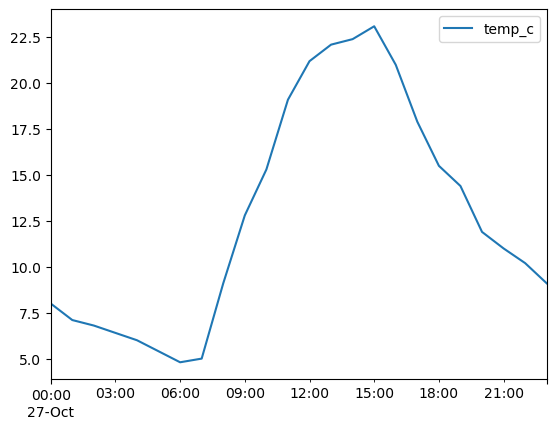

In [96]:
# Now you can use pandas.DataFrame.plot() to create the plot and plt.show() to display it:

temp.plot()
plt.show()

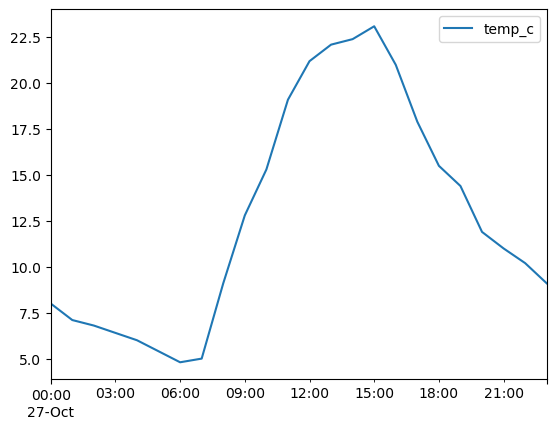

In [97]:
# You can save your figure by chaining the methods .get_figure() and .savefig():

temp.plot().get_figure().savefig('temperatures.png')

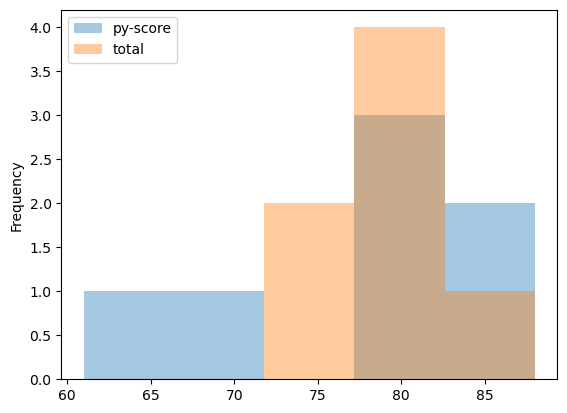

In [100]:
# For example, you can visualize your job candidate data from before as a histogram with .plot.hist():

df.loc[:, ['py-score', 'total']].plot.hist(bins=5, alpha=0.4)
plt.show()